In [2]:
import trendln
from libs.pubsub import get_ps_1
import matplotlib.pyplot as plt
from custom_package import candle
import numpy as np
import datetime
from libs.values import isNonTradingDay
import os
import pickle
import yfinance as yf
import numpy as np

/Users/ronsair/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


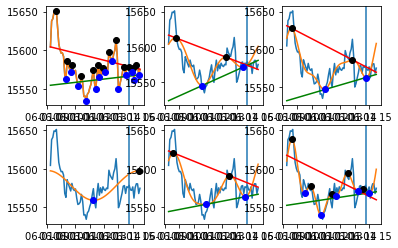

In [3]:
ohlcs = None
# testday = '05-31'
testday = '06-01'
testdaystr = f'2021-{testday}'
fname = f'testdata/^NSEI-{testdaystr}-5m'
testdt = datetime.datetime.strptime(testdaystr, '%Y-%m-%d').date()
if(isNonTradingDay(testdt)):
    print('Non trading day')
else:
    if(os.path.exists(fname)):
        with open(fname, 'rb') as ff:
            ohlcs = pickle.load(ff)
    else:
        print('downloading...')
        ohlcs = yf.download('^NSEI', start=testdt, end=testdt +
                            datetime.timedelta(days=1), interval='5m')
        if(not ohlcs is None):
            with open(fname, 'wb') as ff:
                pickle.dump(ohlcs, ff)

# %matplotlib inline
n_test = 10
n_test_idx = ohlcs.index[-n_test]

def calc(data, ax):
    mins, maxs = trendln.calc_support_resistance(data, accuracy=2)
# def plot(data, mins, maxs, ax):
    (minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs,
                                               pmax, maxtrend, maxwindows) = mins, maxs
    psup = np.poly1d([pmin[0], pmin[1]])
    pres = np.poly1d([pmax[0], pmax[1]])
    ax.plot(ohlcs.index, ohlcs.Close)
    ax.plot(ohlcs.index[:len(data)], data)    
    ax.axvline(n_test_idx)
    ax.plot(ohlcs.index, list(psup(range(len(ohlcs)))), 'g')
    ax.plot(ohlcs.index, list(pres(range(len(ohlcs)))), 'r')
    'ignore the min/max if on the last candle'
    ax.plot(ohlcs.index[maximaIdxs], data[maximaIdxs], 'ok')
    ax.plot(ohlcs.index[minimaIdxs], data[minimaIdxs], 'ob')

#     ax.plot(ohlcs.index[maximaIdxs], ohlcs.iloc[maximaIdxs]['Close'], 'og')
#     ax.plot(ohlcs.index[minimaIdxs], ohlcs.iloc[minimaIdxs]['Close'], 'or')
    
    #     pres1 = np.poly1d((maxtrend[0][1][0], maxtrend[0][1][1]))
    #     ax.plot(ohlcs.index[maxtrend[0][0]], pres1(maxtrend[0][0]))

    #     pres2 = np.poly1d((maxtrend[-1][1][0], maxtrend[-1][1][1] + maxtrend[-1][1][4]))
    #ax.plot(ohlcs.index[maxtrend[1][0]], pres2(maxtrend[1][0]))
    #     ax.plot(ohlcs.index, pres2(range(len(ohlcs))))
    # 'find the latest extremas'
    # i=1
    # minid = minimaIdxs[-1]
    # while(ohlcs.iloc[minimaIdxs[-(i+1)]].Close < ohlcs.iloc[minimaIdxs[-i]].Close and (i+1 < len(minimaIdxs))):
    #     minid = minimaIdxs[-(i+1)]
    #     i+=1
    # i=1
    # maxid = maximaIdxs[-1]
    # while(ohlcs.iloc[maximaIdxs[-(i+1)]].Close > ohlcs.iloc[maximaIdxs[-i]].Close and (i+1 < len(maximaIdxs))):
    #     maxid = maximaIdxs[-(i+1)]
    #     i+=1

    # ax.plot(ohlcs.index[[minid,maxid]], [ohlcs.iloc[minid].Close, ohlcs.iloc[maxid].Close])

    # ax.hlines(y=[ohlcs.iloc[minid].Close, ohlcs.iloc[maxid].Close], xmin=ohlcs.index[minid], xmax=ohlcs.index[maxid])

    # fib_ratios = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
    # levels = [(ohlcs.iloc[maxid].Close-ohlcs.iloc[minid].Close)*ratio for ratio in fib_ratios]
    # ax.hlines(y=[ohlcs.iloc[maxid].Close-x for x in levels], xmin=ohlcs.index[minid], xmax=ohlcs.index[maxid])

ohlcs1 = ohlcs
    
ax1 = plt.subplot(231)
calc(ohlcs1.Close, ax1)
# candle.timeplot(ax1, ohlcs)

datafft = np.fft.rfft(ohlcs1.Close)


n = len(ohlcs1)

ax2 = plt.subplot(234)
dataifft = np.fft.irfft(datafft[0:2], n)
calc(dataifft, ax2)

ax3 = plt.subplot(232)
s1 = np.fft.irfft([*datafft[0:3]], n)
calc(s1, ax3)
# ax3.plot(s1)

ax4 = plt.subplot(235)
s2 = np.fft.irfft([*datafft[0:4]], n)
calc(s2, ax4)

'for now take this'
ax5 = plt.subplot(233)
s3 = np.fft.irfft([*datafft[0:5]], n)
calc(s3, ax5)


ax6 = plt.subplot(236)
s4 = np.fft.irfft([*datafft[0:6]], n)
calc(s4, ax6)

'TODO: move the frequency higher if extremas are not found'

'Conclusion moving averages dont fit well'
# ax5 = plt.subplot(233)
# s3 = ohlcs.Close.rolling(3, center=True).mean()
# calc(s3, ax5)

# ax6 = plt.subplot(236)
# s4 = ohlcs.Close.rolling(5, center=True).mean()
# calc(s4, ax6)


plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi'] = 100 #
plt.show()

In [6]:
len(s3)==len(ohlcs)

True

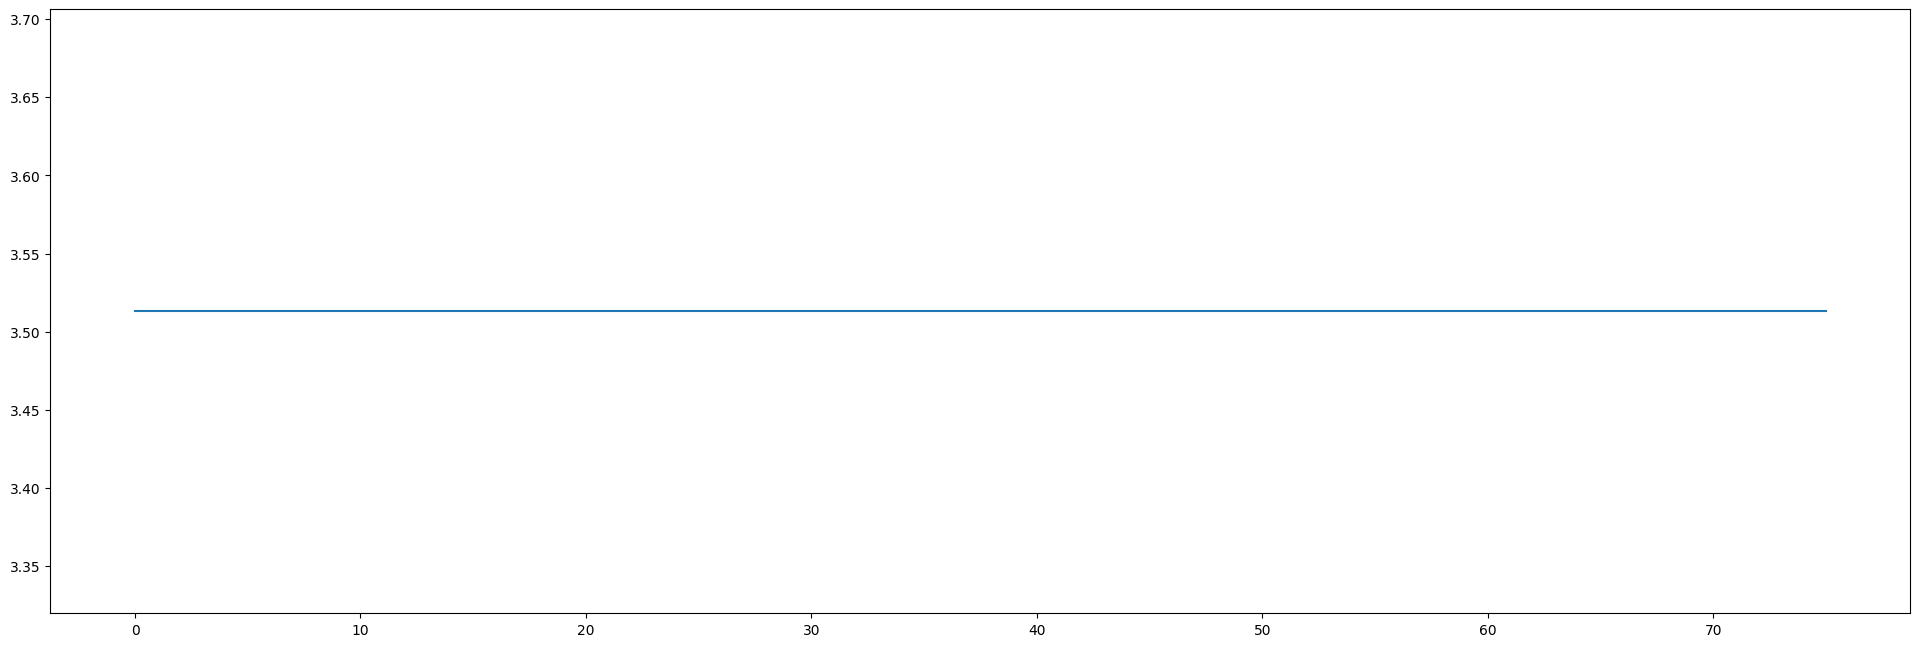

In [158]:
dataifft = np.fft.irfft(datafft[3:4],n)
plt.plot(dataifft)
plt.show()

In [181]:
np.fft.fftfreq(n,1)

array([ 0.        ,  0.01315789,  0.02631579,  0.03947368,  0.05263158,
        0.06578947,  0.07894737,  0.09210526,  0.10526316,  0.11842105,
        0.13157895,  0.14473684,  0.15789474,  0.17105263,  0.18421053,
        0.19736842,  0.21052632,  0.22368421,  0.23684211,  0.25      ,
        0.26315789,  0.27631579,  0.28947368,  0.30263158,  0.31578947,
        0.32894737,  0.34210526,  0.35526316,  0.36842105,  0.38157895,
        0.39473684,  0.40789474,  0.42105263,  0.43421053,  0.44736842,
        0.46052632,  0.47368421,  0.48684211, -0.5       , -0.48684211,
       -0.47368421, -0.46052632, -0.44736842, -0.43421053, -0.42105263,
       -0.40789474, -0.39473684, -0.38157895, -0.36842105, -0.35526316,
       -0.34210526, -0.32894737, -0.31578947, -0.30263158, -0.28947368,
       -0.27631579, -0.26315789, -0.25      , -0.23684211, -0.22368421,
       -0.21052632, -0.19736842, -0.18421053, -0.17105263, -0.15789474,
       -0.14473684, -0.13157895, -0.11842105, -0.10526316, -0.09

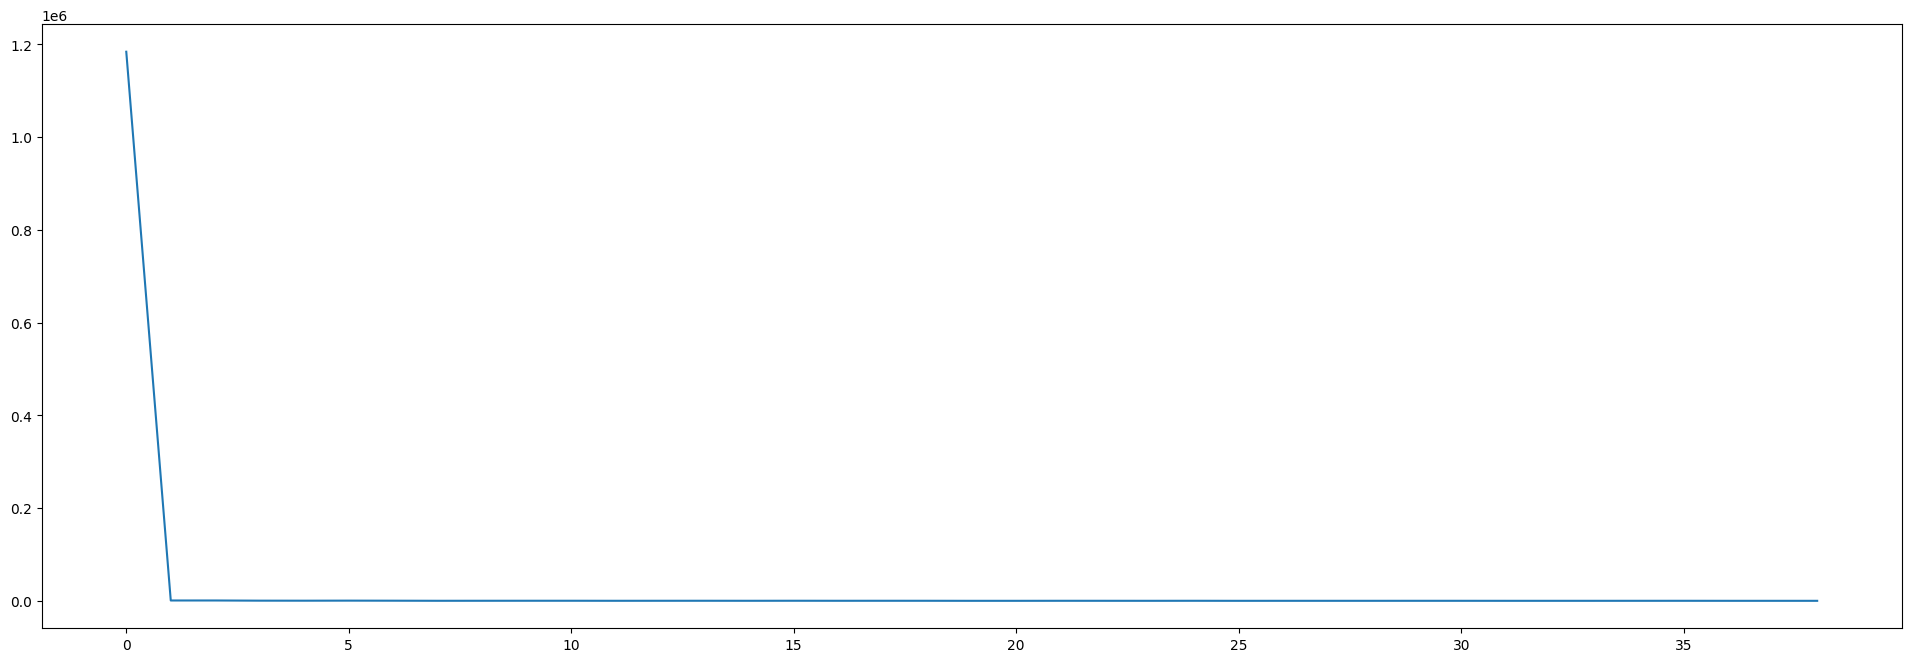

In [183]:
freqs = np.fft.fftfreq(n,1)
plt.plot(np.abs(datafft))
plt.show()

In [164]:
spectrum

array([ 0.        ,  0.01315789,  0.02631579,  0.03947368,  0.05263158,
        0.06578947,  0.07894737,  0.09210526,  0.10526316,  0.11842105,
        0.13157895,  0.14473684,  0.15789474,  0.17105263,  0.18421053,
        0.19736842,  0.21052632,  0.22368421,  0.23684211,  0.25      ,
        0.26315789,  0.27631579,  0.28947368,  0.30263158,  0.31578947,
        0.32894737,  0.34210526,  0.35526316,  0.36842105,  0.38157895,
        0.39473684,  0.40789474,  0.42105263,  0.43421053,  0.44736842,
        0.46052632,  0.47368421,  0.48684211, -0.5       , -0.48684211,
       -0.47368421, -0.46052632, -0.44736842, -0.43421053, -0.42105263,
       -0.40789474, -0.39473684, -0.38157895, -0.36842105, -0.35526316,
       -0.34210526, -0.32894737, -0.31578947, -0.30263158, -0.28947368,
       -0.27631579, -0.26315789, -0.25      , -0.23684211, -0.22368421,
       -0.21052632, -0.19736842, -0.18421053, -0.17105263, -0.15789474,
       -0.14473684, -0.13157895, -0.11842105, -0.10526316, -0.09

In [143]:
datafft[2]/76

(3.0995184669443168-9.186686662474242j)

In [136]:
datafft

array([ 1.18396240e+06+0.00000000e+00j,  7.20499895e+02+1.01092721e+02j,
        2.35563403e+02-6.98188186e+02j,  2.66991070e+02-2.31059299e+02j,
        1.51531260e+02-2.46652696e+02j, -1.73484917e+02-3.77384487e+02j,
        3.58345494e+01-2.79029216e+02j, -3.31890937e+00-8.97957525e+01j,
       -1.27646673e+02+2.94129030e+01j, -4.65808283e+01-1.52805366e+02j,
       -1.03917029e+02-1.36571792e+02j,  7.00021799e+01+2.64210688e+01j,
       -1.19048842e+02+1.24519555e+01j, -1.27299213e+02-6.84865650e+01j,
        7.21588737e+01-5.57517743e+01j,  1.66736743e+02+2.09737913e+01j,
       -7.27418196e+01-7.21492694e+01j,  6.37298993e+01-1.07123846e+02j,
       -2.54206510e+01-1.10091164e+02j,  8.89843750e+00+2.99804688e-01j,
       -1.73120412e+01+2.28373026e-01j,  8.37826075e+01-2.16702598e+01j,
        2.45836913e+01-5.83739856e+01j,  2.28228073e+01+3.08455034e+01j,
       -1.04626370e+02-5.31826083e+00j,  7.27265915e+00-7.36131248e-01j,
        3.52374848e+01+8.84151637e+00j,  1.33105844